# import library


In [1]:
import pandas as pd #pandas is used for creating Dataframes

import librosa # librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files 
import librosa.display # to play the audio files
import numpy as np #numpy is used for array or multidimensional array
import matplotlib.pyplot as plt #used for ploting
import os # for working with path directory
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook

import warnings  ### ignore warning



In [2]:
from IPython import get_ipython #ipython --- interactive python
ip = get_ipython()
ip.InteractiveTB.set_mode(mode="Verbose")

# EDA

In [3]:
filename=('Male.wav') #sample male voice
filename2=('Female.wav')#sample female voice

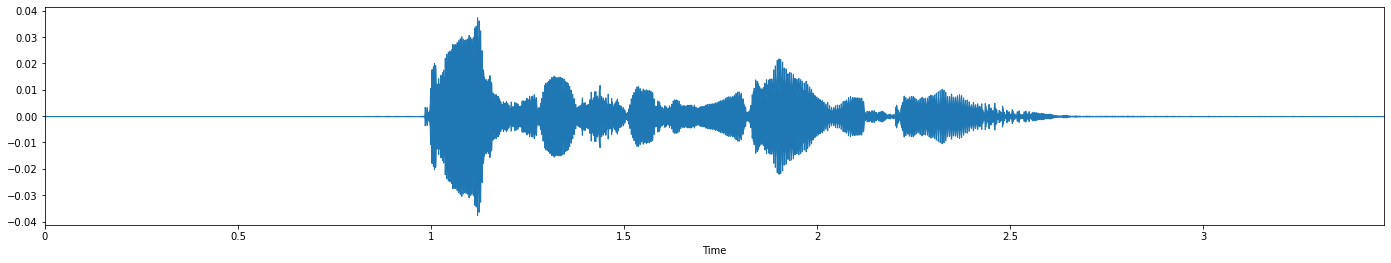

In [4]:
## female voice wave form
plt.figure(figsize=(24,4))  
data,sample_rate=librosa.load(filename2)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename2)

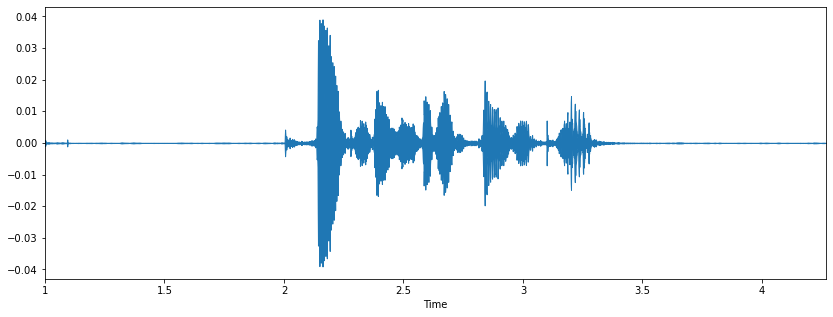

In [5]:
### male voice wave form
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate,offset=1)
ipd.Audio(filename2)



In [6]:
print(sample_rate) #sample rate

22050


In [7]:
print(data) 

[ 4.1028496e-04  6.0859817e-04  5.4656656e-04 ...  6.5056093e-07
 -6.4842504e-07  0.0000000e+00]


In [8]:
data.shape

(72102,)

[-35.58489  -34.397457 -31.443419 -30.703869 -31.435661 -30.766901
 -31.38492  -31.390003 -31.522196 -31.088387 -30.758303 -30.381092
 -30.664944 -31.384846 -30.932606 -30.522902 -30.741344 -29.68739
 -29.180944 -28.636534 -27.253626 -22.1766   -19.726048 -21.549765
 -24.374783 -25.88472  -25.937622 -20.636858 -19.071571 -20.95639
 -22.650558 -23.968287 -25.314112 -24.7869   -23.845663 -23.557615
 -23.62365  -24.256481 -23.355679 -23.193884 -24.319376 -24.252056
 -23.885126 -24.135403 -26.113031 -25.784399 -24.084879 -21.770334
 -20.611305 -20.138588 -20.744505 -22.80237  -22.721682 -23.85536
 -24.713663 -25.867193 -21.413895 -18.038235 -18.005245 -19.844275
 -21.15812  -21.654675 -21.89117  -22.705574 -22.13192  -22.178762
 -22.519442 -23.199415 -20.765867 -18.992508 -20.738245 -22.67637
 -20.961075 -18.765661 -18.050192 -18.330235 -19.644796 -21.23061
 -24.437593 -25.29198  -26.150219 -25.95918  -27.38792  -28.734999
 -29.87057  -31.949678 -31.58326  -31.097803 -31.712889 -31.381422


Text(0.5, 0, 'Frames')

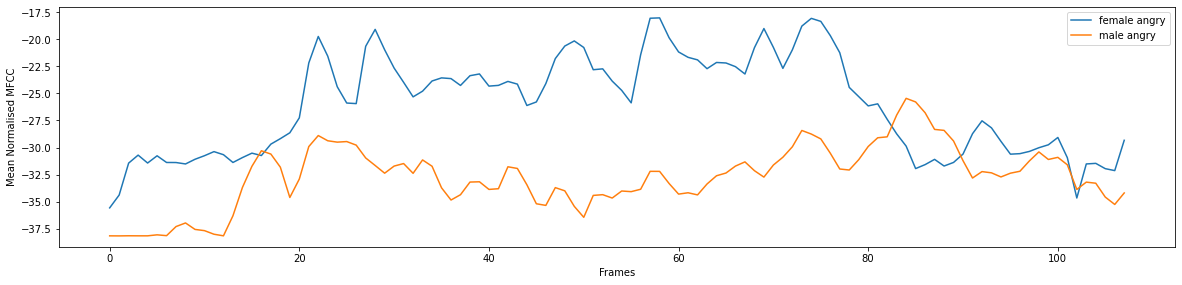

In [9]:
# Gender - Female; Emotion - Angry 
path = "Male.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=23,hop_length = 160)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=23), axis=0)
print(female)


# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "Female.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=23,hop_length = 160)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=23), axis=0)
print(len(male))

# audio wave mfcc value for male and female
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female angry')
plt.plot(male, label='male angry')
plt.legend()
plt.ylabel('Mean Normalised MFCC')
plt.xlabel('Frames')

In [10]:
#audio pitch
y, sr = librosa.load(filename2)
pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
print(pitches)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=20,hop_length = 160)
female.shape

(20, 345)

In [12]:
female

array([[-8.7770050e+02, -8.7758081e+02, -8.7734918e+02, ...,
        -8.4707141e+02, -8.4947314e+02, -8.5196942e+02],
       [-2.2974210e-03, -6.1590532e-03,  1.3945691e-02, ...,
         3.3791164e+01,  3.1958055e+01,  2.9594063e+01],
       [-9.4283089e-02, -2.6342195e-01, -5.3700107e-01, ...,
         1.6089684e+01,  1.6928448e+01,  1.6885761e+01],
       ...,
       [-3.7131026e-02, -9.9731497e-02, -2.2980304e-01, ...,
        -2.8903406e+00, -1.5540587e+00, -5.4977745e-01],
       [-8.3433896e-02, -2.3506632e-01, -5.2402687e-01, ...,
         2.2827573e+00,  2.0008090e+00,  1.4782256e+00],
       [ 4.0974140e-02,  1.1010780e-01,  2.1093839e-01, ...,
         1.7092721e+00,  1.2897577e+00,  7.0298159e-01]], dtype=float32)

In [13]:
#loading mfcc values
m = pd.DataFrame(female)

In [14]:
m

,0,1,2,3,4,5,6,7,8,9,...,335,336,337,338,339,340,341,342,343,344
0,-877.700500,-877.580811,-877.349182,-877.081848,-877.011414,-877.209106,-877.555237,-877.732178,-877.767334,-877.767334,...,-831.909058,-837.467651,-841.433899,-843.466431,-844.262939,-844.886414,-845.405029,-847.071411,-849.473145,-851.969421
1,-0.002297,-0.006159,0.013946,0.156980,0.229414,0.227370,0.163724,0.049180,0.000000,0.000000,...,44.921936,41.042183,37.881786,35.976952,34.624714,33.975632,34.310001,33.791164,31.958055,29.594063
2,-0.094283,-0.263422,-0.537001,-0.623829,-0.581106,-0.314986,0.028147,0.047835,0.000000,0.000000,...,14.159767,14.882490,14.920656,14.113674,13.052973,13.079756,14.312861,16.089684,16.928448,16.885761
3,0.006883,0.018452,0.064223,0.211669,0.276438,0.256958,0.158780,0.045617,0.000000,0.000000,...,1.419405,2.522734,3.106083,3.112358,3.037457,3.787645,5.012224,6.699481,8.411749,9.731342
4,0.093865,0.262319,0.584344,0.940225,1.029577,0.752507,0.275884,0.042568,0.000000,0.000000,...,2.914593,2.962143,2.998938,3.197911,3.467901,3.886883,4.299393,4.826640,5.811617,7.094246
5,-0.011439,-0.030671,-0.043811,0.053108,0.112763,0.129924,0.121589,0.038749,0.000000,0.000000,...,2.160899,2.955112,3.263679,2.603504,1.751291,0.622080,0.090065,0.244869,0.811075,1.963685
6,-0.093166,-0.260502,-0.538312,-0.663662,-0.640939,-0.375788,-0.017229,0.034224,0.000000,0.000000,...,-6.517358,-3.807467,-2.052227,-2.393410,-4.028119,-5.977154,-6.586606,-6.390081,-5.583728,-4.234303
7,0.015948,0.042767,0.106744,0.219658,0.257832,0.222906,0.110136,0.029074,0.000000,0.000000,...,-8.095461,-5.654646,-3.511135,-2.882936,-3.517557,-4.630755,-5.434516,-5.808394,-5.135121,-4.249726
8,0.092185,0.257961,0.564600,0.860103,0.921631,0.651259,0.210748,0.023398,0.000000,0.000000,...,-0.899966,-0.045909,0.786750,1.740250,2.407442,2.761907,2.706162,2.388521,2.186635,1.796741
9,-0.020390,-0.054690,-0.106585,-0.088364,-0.057630,-0.020245,0.042392,0.017293,0.000000,0.000000,...,7.245191,5.919896,5.274421,5.648373,6.887687,7.906460,8.067520,7.959068,6.924344,5.594128


In [15]:
len(pitches)

1025

In [16]:
pitches[445]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [17]:
# ### import all the audio file
# RAV='C:\\Users\\Anu\\Desktop\\Prashant\\my voice\\4 actors voice\\Actor_05'
# dir_list=os.listdir(RAV)
# dir_list


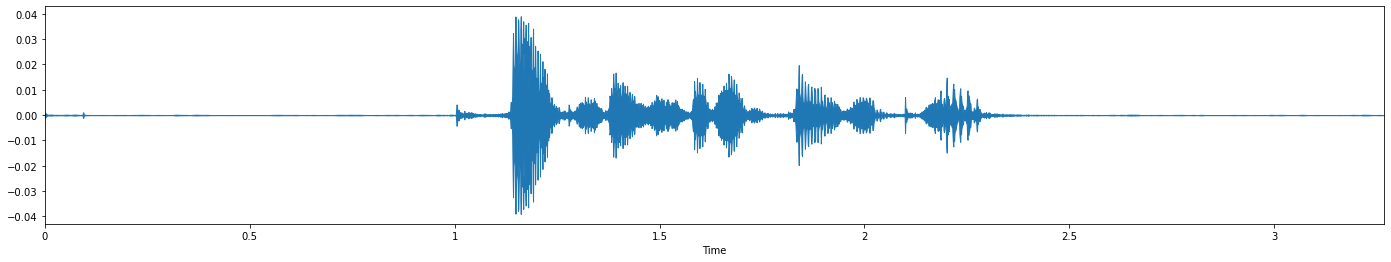

In [18]:
plt.figure(figsize=(24,4))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)


In [19]:
x, sr =librosa.load(filename2)
ipd.Audio(x, rate=sr)

# feature extration

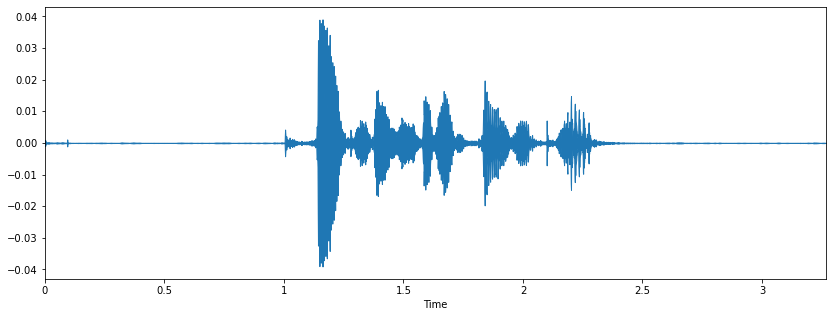

In [20]:
#zero crossing rate

x, sr = librosa.load(filename)
#Plot the signal:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

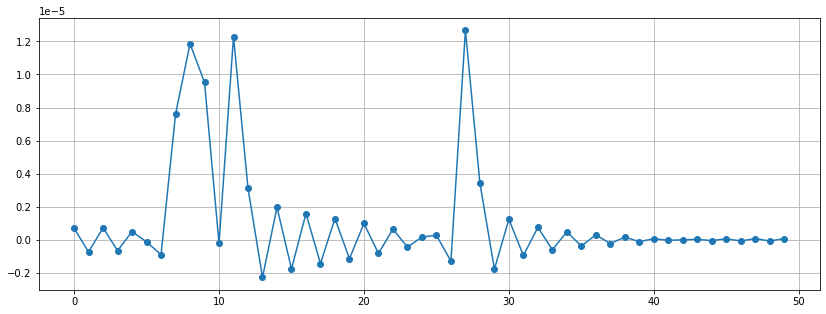

In [21]:
# Zooming in
n0 = 9000
n1 = 9050
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1], marker='o')
plt.grid()

In [22]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))
len(zero_crossings)

42


50

In [23]:
zero_crossings = librosa.zero_crossings(x, pad=False)
print(sum(zero_crossings))
len(zero_crossings)

14950


72102

In [24]:
zero_crossings

array([False, False, False, ...,  True,  True,  True])

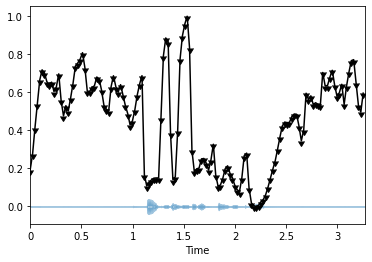

In [25]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound

import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='black', marker=11)

In [26]:
spectral_centroids

array([1568.4181719 , 1971.76744795, 2648.65928032, 3274.39660808,
       3882.35556847, 4150.24807269, 4068.01759889, 3844.91414075,
       3774.72441721, 3832.27307748, 3588.8357194 , 3710.60416908,
       4046.54812407, 3357.99763784, 2960.52355862, 3223.43435608,
       3088.28493199, 3424.05500466, 3796.15677084, 4246.40274948,
       4329.12288743, 4426.66598929, 4593.73008464, 4202.573166  ,
       3600.85317315, 3593.9088002 , 3695.35035084, 3738.81434501,
       3965.53207177, 3909.94689532, 3622.421697  , 3232.79526382,
       3133.38037229, 3085.87462602, 3709.74657734, 3997.38562284,
       3715.87968705, 3572.441119  , 3766.65420587, 3501.74306957,
       3228.92136363, 3019.73319523, 2724.99769435, 2832.73433542,
       3116.07393529, 3497.10917511, 3782.39252701, 3999.94226077,
       1439.65529822, 1146.23424594, 1244.96645013, 1306.98019131,
       1350.35232125, 1355.48389732, 1356.45958484, 2904.34891139,
       4510.14628778, 4975.13392438, 4878.43127353, 2512.71198

(20, 141)


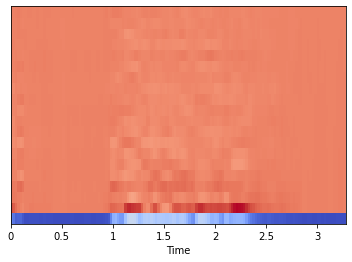

In [27]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)
#Displaying  the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [28]:
mfccs

array([[-734.63385  , -760.92456  , -812.80756  , ..., -858.587    ,
        -859.6556   , -861.3934   ],
       [ 105.3363   ,   87.79391  ,   50.977333 , ...,   13.354187 ,
          12.034065 ,    9.668468 ],
       [  31.455566 ,   31.717701 ,   27.263702 , ...,   12.675776 ,
          11.707884 ,    9.52338  ],
       ...,
       [   6.9255285,    8.223779 ,   10.349808 , ...,    6.7101955,
           7.357837 ,    6.1185837],
       [   6.8077984,    7.841052 ,   10.407984 , ...,    6.6773095,
           6.9335127,    5.7981668],
       [   8.137312 ,    9.178725 ,   11.541041 , ...,    6.9140673,
           6.5895557,    5.500373 ]], dtype=float32)

# train model using decision tree classifier

# for male and female audio classification

In [29]:
metadata=pd.read_csv('demo.csv')   #### loading austic feature


In [30]:
metadata

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [31]:
metadata.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [32]:
metadata.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [33]:
metadata.describe().drop('count')

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [34]:
metadata['label'].value_counts()

female    1584
male      1584
Name: label, dtype: int64

In [35]:
df = pd.read_csv('demo.csv')

In [36]:
df.shape

(3168, 21)

In [37]:
df.label.value_counts()

female    1584
male      1584
Name: label, dtype: int64

In [38]:
male = df.label== 'male'
female= df.label== 'female'

In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import validation_curve

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


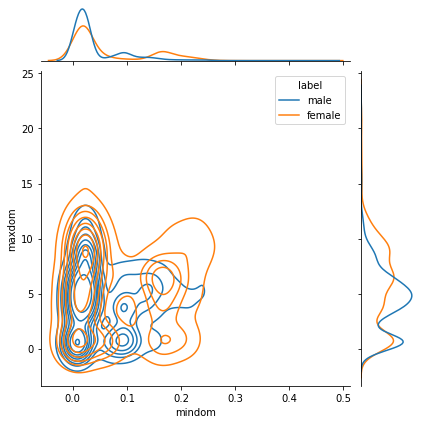

In [40]:
#2D KDE Plot
sns.jointplot("mindom", "maxdom", df, kind='kde', hue='label');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


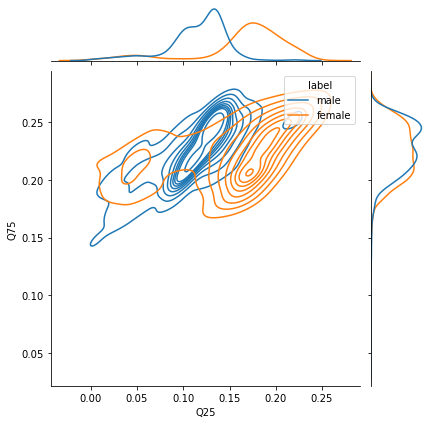

In [41]:
sns.jointplot("Q25", "Q75", df, kind='kde', hue='label');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mindom', ylabel='maxdom'>

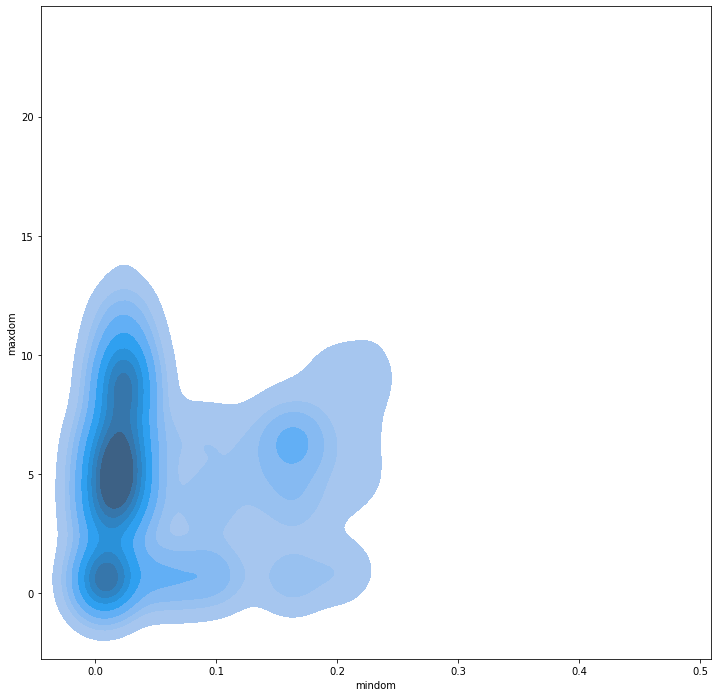

In [42]:
plt.figure(figsize=(12,12))
sns.kdeplot(df.mindom, df.maxdom,  shade=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in fav

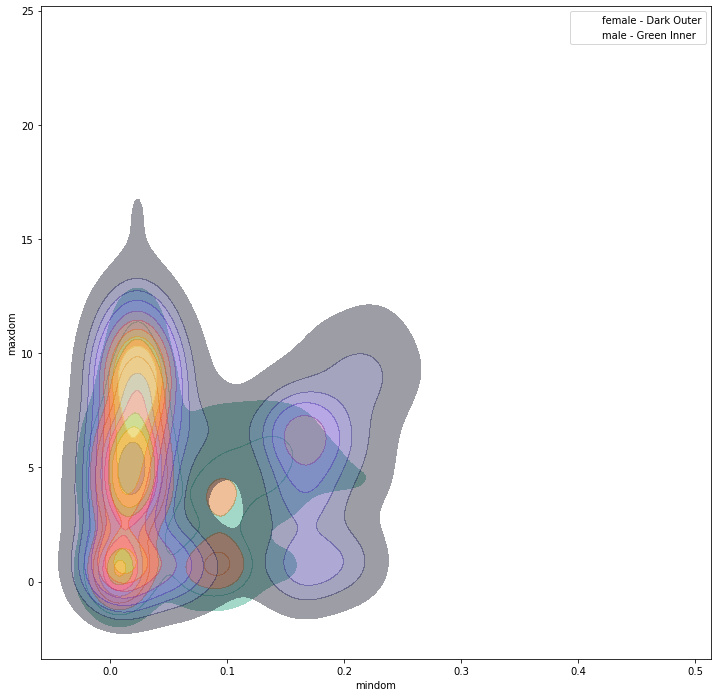

In [43]:
plt.figure(figsize=(12,12))
sns.kdeplot(df[male].mindom, df[male].maxdom, cmap="Dark2",  shade=True, alpha=0.4, shade_lowest=False, label='female - Dark Outer')
sns.kdeplot(df[female].mindom, df[female].maxdom, cmap="CMRmap", shade=True, alpha=0.4, shade_lowest=False, label='male - Green Inner')
plt.legend()

<AxesSubplot:xlabel='label', ylabel='meanfun'>

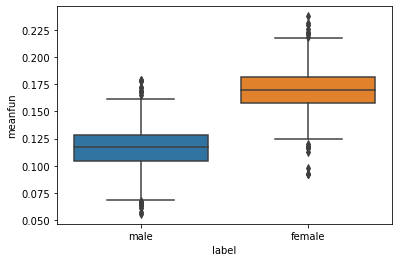

In [44]:
sns.boxplot(x="label", y="meanfun", data=df)

Text(11.170891203703704, 0.5, 'Probability Density')

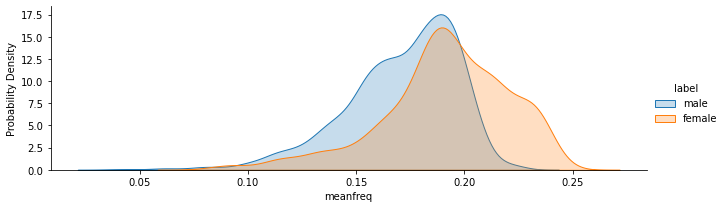

In [45]:
# 1D KDE plot
fig = sns.FacetGrid(df, hue="label", aspect=3) # aspect=3 
fig.map(sns.kdeplot, "meanfreq", shade=True)
fig.add_legend()
plt.ylabel('Probability Density')

In [46]:
data_train = df.sample(frac=0.8, random_state=1)          
data_test = df.drop(data_train.index) 

In [47]:
data_train #train data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
2485,0.207585,0.031595,0.209280,0.188722,0.222849,0.034126,3.406637,18.322269,0.816958,0.179266,...,0.207585,0.169564,0.047714,0.275862,1.751838,0.023438,12.023438,12.000000,0.090088,female
1611,0.149002,0.083574,0.185332,0.064760,0.215240,0.150479,2.436047,11.595644,0.956487,0.718422,...,0.149002,0.187319,0.050794,0.275862,0.608696,0.007812,3.406250,3.398438,0.204807,female
1648,0.151097,0.086332,0.183914,0.061055,0.221197,0.160143,1.659775,6.155128,0.958604,0.710824,...,0.151097,0.187887,0.041995,0.242424,0.298234,0.015625,0.851562,0.835938,0.244326,female
3027,0.184984,0.039844,0.184730,0.180083,0.195574,0.015491,5.838121,43.814325,0.812469,0.283567,...,0.184984,0.185932,0.178571,0.277778,0.419312,0.180664,0.766602,0.585938,0.647727,female
2281,0.218647,0.033346,0.219148,0.201250,0.240625,0.039375,2.035893,6.687083,0.834888,0.166016,...,0.218647,0.187419,0.048096,0.274286,0.787861,0.023438,10.617188,10.593750,0.048311,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,0.217759,0.031261,0.223285,0.199100,0.237762,0.038662,2.038032,6.674460,0.861819,0.154920,...,0.217759,0.193159,0.017335,0.271186,1.109086,0.007812,5.914062,5.906250,0.177407,female
66,0.141153,0.080922,0.124305,0.097152,0.222242,0.125090,1.724298,6.313517,0.949959,0.646653,...,0.141153,0.117298,0.018868,0.258065,0.639617,0.007812,4.062500,4.054688,0.187230,male
1055,0.184142,0.053220,0.203671,0.129644,0.222849,0.093205,2.066273,7.260472,0.892495,0.339382,...,0.184142,0.125153,0.047244,0.277457,0.795573,0.023438,6.046875,6.023438,0.097356,male
1739,0.194774,0.030266,0.190627,0.175387,0.209483,0.034096,2.797844,11.259050,0.838213,0.129738,...,0.194774,0.145136,0.016478,0.275862,1.489062,0.179688,6.976562,6.796875,0.283908,female


In [48]:
data_test #test data

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
14,0.183115,0.066982,0.191233,0.129149,0.240152,0.111004,3.568104,35.384748,0.940333,0.571394,...,0.183115,0.102799,0.020833,0.275862,1.245739,0.203125,6.742188,6.539062,0.139332,male
15,0.174272,0.069411,0.190874,0.115602,0.228279,0.112677,4.485038,61.764908,0.950972,0.635199,...,0.174272,0.102046,0.018328,0.246154,1.621299,0.007812,7.000000,6.992188,0.209311,male
18,0.168346,0.074121,0.145618,0.115756,0.239824,0.124068,2.704335,18.484703,0.934523,0.559742,...,0.168346,0.083484,0.015717,0.231884,0.146563,0.007812,3.125000,3.117188,0.059537,male
20,0.172754,0.076903,0.177736,0.120070,0.245368,0.125298,2.967765,20.078115,0.925539,0.523081,...,0.172754,0.093574,0.015764,0.200000,0.235877,0.007812,0.718750,0.710938,0.235069,male
25,0.164700,0.075362,0.147018,0.118698,0.240475,0.121777,4.208608,43.681885,0.940669,0.604020,...,0.164700,0.082963,0.015640,0.253968,0.143353,0.007812,1.062500,1.054688,0.125926,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142,0.104793,0.085201,0.077886,0.028388,0.186101,0.157712,2.419127,11.281968,0.956977,0.718462,...,0.104793,0.183565,0.016444,0.275862,0.297953,0.007812,0.859375,0.851562,0.370904,female
3146,0.124695,0.080989,0.131882,0.042033,0.197268,0.155234,1.970756,8.000504,0.958531,0.721682,...,0.124695,0.182513,0.068966,0.238806,0.293527,0.007812,0.851562,0.843750,0.396091,female
3148,0.108888,0.092021,0.070063,0.022520,0.201180,0.178660,2.235435,8.528681,0.947621,0.679795,...,0.108888,0.160473,0.019512,0.275862,0.497721,0.007812,2.945312,2.937500,0.236240,female
3160,0.151771,0.089147,0.185970,0.058159,0.230199,0.172040,1.227710,4.304354,0.962045,0.744590,...,0.151771,0.201600,0.023426,0.266667,0.766741,0.007812,4.007812,4.000000,0.192220,female


In [49]:
X_train = data_train.drop(['label'], axis=1)
y_train = data_train['label']
X_test = data_test.drop(['label'], axis=1)
y_test = data_test['label']

Text(10.123726851851856, 0.5, 'Probability Density')

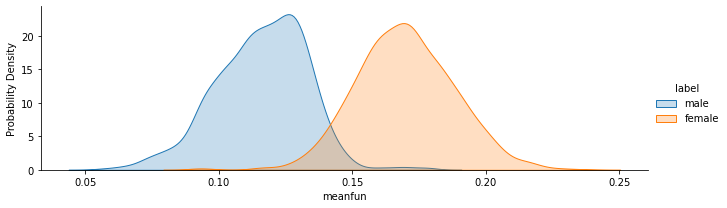

In [50]:
fig = sns.FacetGrid(df, hue="label", aspect=3)
fig.map(sns.kdeplot, "meanfun", shade=True)
fig.add_legend()
plt.ylabel('Probability Density')

Text(10.477314814814818, 0.5, 'Probability Density')

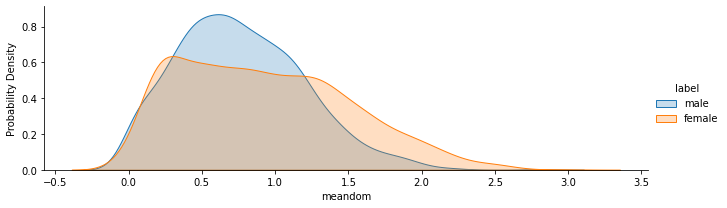

In [51]:
fig = sns.FacetGrid(df[df.meanfun>0.09], hue="label", aspect=3) 
fig.map(sns.kdeplot, "meandom", shade=True)
fig.add_legend()
plt.ylabel('Probability Density')

Text(10.123726851851856, 0.5, 'Probability Density')

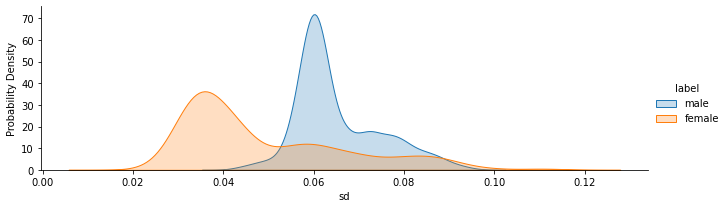

In [52]:
fig = sns.FacetGrid(df, hue="label", aspect=3)
fig.map(sns.kdeplot, "sd", shade=True)
fig.add_legend()
plt.ylabel('Probability Density')


# 'meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
#        'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
#        'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'

Text(11.170891203703704, 0.5, 'Probability Density')

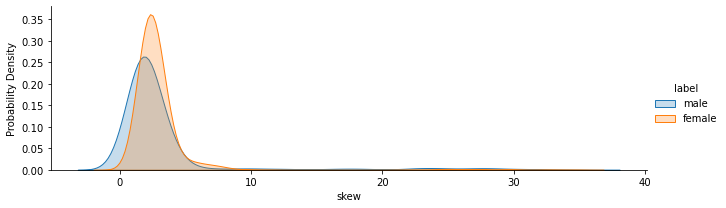

In [53]:
fig = sns.FacetGrid(df, hue="label", aspect=3)
fig.map(sns.kdeplot, "skew", shade=True)
fig.add_legend()
plt.ylabel('Probability Density')

Text(10.123726851851856, 0.5, 'Probability Density')

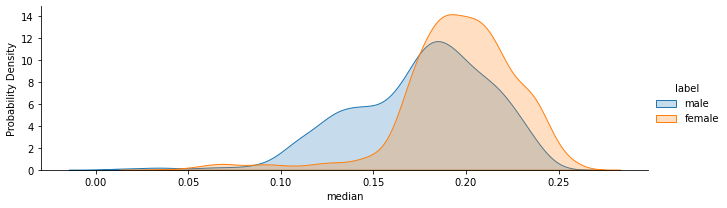

In [54]:
fig = sns.FacetGrid(df, hue="label", aspect=3)
fig.map(sns.kdeplot, "median", shade=True)
fig.add_legend()
plt.ylabel('Probability Density')


Text(12.558043981481475, 0.5, 'Probability Density')

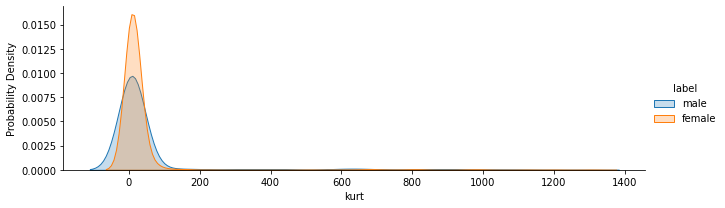

In [55]:
fig = sns.FacetGrid(df, hue="label", aspect=3)
fig.map(sns.kdeplot, "kurt", shade=True)
fig.add_legend()
plt.ylabel('Probability Density')

Text(10.477314814814818, 0.5, 'Probability Density')

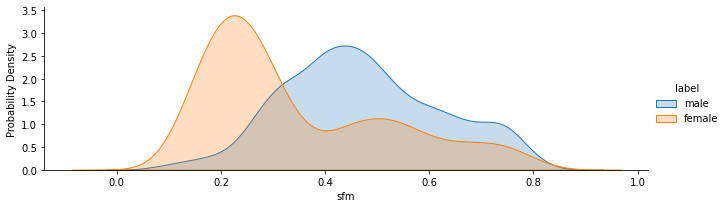

In [56]:
fig = sns.FacetGrid(df, hue="label", aspect=3)
fig.map(sns.kdeplot, "sfm", shade=True)
fig.add_legend()
plt.ylabel('Probability Density')

Text(10.123726851851856, 0.5, 'Probability Density')

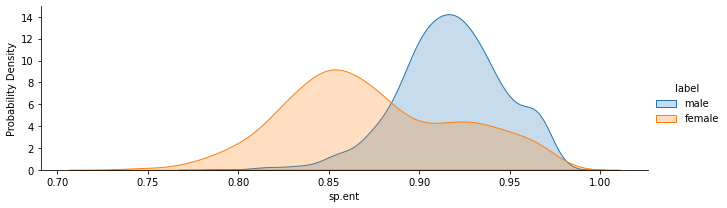

In [57]:
fig = sns.FacetGrid(df, hue="label", aspect=3)
fig.map(sns.kdeplot, "sp.ent", shade=True)
fig.add_legend()
plt.ylabel('Probability Density')

Text(10.123726851851856, 0.5, 'Probability Density')

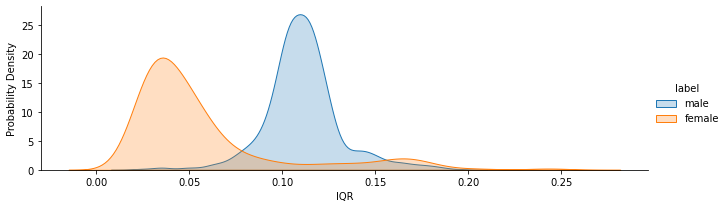

In [58]:
fig = sns.FacetGrid(df, hue="label", aspect=3)
fig.map(sns.kdeplot, "IQR", shade=True)
fig.add_legend()
plt.ylabel('Probability Density')

Text(11.170891203703704, 0.5, 'Probability Density')

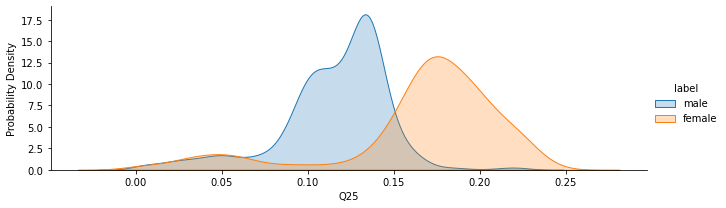

In [59]:
fig = sns.FacetGrid(df, hue="label", aspect=3)
fig.map(sns.kdeplot, "Q25", shade=True)
fig.add_legend()
plt.ylabel('Probability Density')


<AxesSubplot:xlabel='kurt', ylabel='Density'>

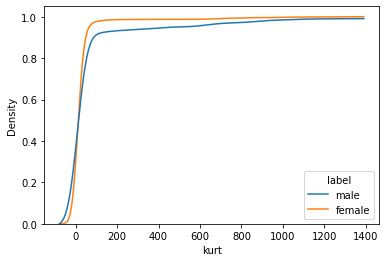

In [60]:
sns.kdeplot(
    data=df, x="kurt", hue="label",
    cumulative=True, common_norm=False, common_grid=True,
)

Text(11.170891203703704, 0.5, 'Probability Density')

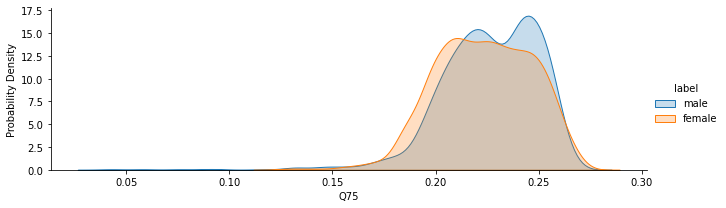

In [61]:
fig = sns.FacetGrid(df, hue="label", aspect=3)
fig.map(sns.kdeplot, "Q75", shade=True)
fig.add_legend()
plt.ylabel('Probability Density')


Text(10.123726851851856, 0.5, 'Probability Density')

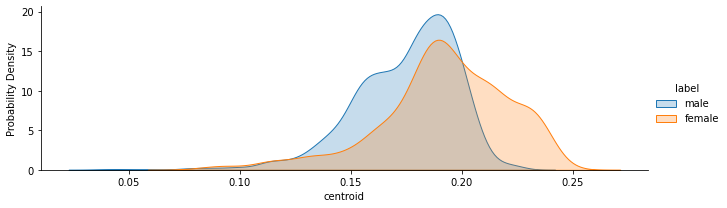

In [62]:
fig = sns.FacetGrid(df[(df.meanfun>0.09) & (df.meandom>0.1)], hue="label", aspect=3) 
fig.map(sns.kdeplot, "centroid", shade=True)
fig.add_legend()
plt.ylabel('Probability Density')


# from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_dtc = dtc.predict(X_test)
print(accuracy_score(y_test, y_dtc))

In [ ]:
#decision tree classifier
from sklearn import tree
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_dtc = dtc.predict(X_test)
#print(accuracy_score(y_test, y_dtc))

In [ ]:
plt.figure(figsize=(30,30))
tree.plot_tree(dtc, feature_names=X_train.columns, class_names=['male','female'], fontsize=14, filled=True) 

In [ ]:
metadata

In [ ]:
dtc1 = tree.DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 20)
dtc1.fit(X_train,y_train)

In [ ]:
plt.figure(figsize=(30,30))
tree.plot_tree(dtc1, feature_names=X_train.columns, class_names=['female','male'], fontsize=14, filled=True)

In [ ]:
X_train.shape,X_test.shape

In [ ]:
# from sklearn import tree 
# dtc = tree.DecisionTreeClassifier() 
# dtc.fit(X_train,y_train) 
# y_dtc = dtc.predict(X_test)
# print(classification_report(y_test,y_dtc))
# print(accuracy_score(y_test, y_dtc1))

In [ ]:
#saomya modification for above code
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
dtc = tree.DecisionTreeClassifier() 
dtc.fit(X_train,y_train) 
y_dtc = dtc.predict(X_test)
print(classification_report(y_test,y_dtc))
print(accuracy_score(y_test, y_dtc))

In [ ]:
cm = confusion_matrix(y_test,y_dtc)
df_cm = pd.DataFrame(cm)
sns.heatmap(df_cm, annot=True, fmt='')
plt.show()

# decision tree acuracy= 96%

# train model using Xgboost

In [ ]:
pip install xgboost

In [ ]:
# # Import label encoder
# from sklearn import preprocessing

# # label_encoder object knows how to understand word labels.
# label_encoder = preprocessing.LabelEncoder()

# # Encode labels in column 'species'.
# metadata['label']= label_encoder.fit_transform(metadata['label'])

# metadata['label'].unique()


In [ ]:
metadata

In [ ]:
y_train, y_test

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y_train= label_encoder.fit_transform(y_train)

y_train

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y_test= label_encoder.fit_transform(y_test)

y_test

In [ ]:
import xgboost as XGB
import seaborn as sn

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score
xgb  = XGB.XGBClassifier()
xgb.fit(X_train, y_train)
y_xgb = xgb.predict(X_test)
cm = confusion_matrix(y_test, y_xgb)
print(cm)
print(classification_report(y_test, y_xgb))
print(accuracy_score(y_test, y_xgb))

In [ ]:
X_train.shape,X_test.shape

In [ ]:

y_xgb = xgb.predict(X_test)
print(accuracy_score(y_test, y_xgb))

In [ ]:
cm = confusion_matrix(y_test,y_xgb)
df_cm = pd.DataFrame(cm)
sn.heatmap(df_cm, annot=True, fmt='')
plt.show()

# xgboost accuracy=95%

# mfcc feature extration for emotion detection

In [ ]:
data = pd.read_csv('features.csv')

In [ ]:
sns.jointplot("meanfreq", "sd", df, kind='kde', hue='label');

In [ ]:
data

In [ ]:
data.describe()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X = data.drop('labels', axis = 1).values
y = data['labels'].values

In [ ]:
X = data.drop(['labels','19'], axis = 1).values
y = data['labels'].values

In [ ]:
#ADDITIONAL STUFF
data_frame = pd.DataFrame(X)
#data_frame = data_frame.drop('labels', axis = 1)
data_frame

In [ ]:
# data_frame.corr()
# sns.heatmap(data_frame.corr(),square=True, annot=True, vmin= 0.6, vmax=0.999, annot_kws={'size': 15})
# sns.set(rc={'figure.figsize':(70,70)})

import matplotlib.pyplot as mtb
sns.heatmap(data_frame.corr(), square=True, annot=True, vmin= 0.6, vmax=0.999, annot_kws={'size': 10})
mtb.show()

In [ ]:
sns.pairplot(data, hue="labels")

In [ ]:
#sns.histplot(data_frame)

In [ ]:
print(y)

In [ ]:
X.shape, y.shape

In [ ]:
np.unique(y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
X_train, X_test, y_train, y_test

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(kernel = 'linear')

In [ ]:
import time

starting_time = time.time()
svclassifier.fit(X_train, y_train)
print("Trained model in %s ms " % str(time.time() - starting_time))

In [ ]:
y_pred = svclassifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sn

print(classification_report(y_test,y_pred))

acc = float(accuracy_score(y_test,y_pred))*100
print("----accuracy score %s ----" % acc)

cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm)

plt.show()

In [ ]:
X_train, y_train,y_test,y_pred

In [ ]:
train_acc = float(svclassifier.score(X_train, y_train)*100)
print("----train accuracy score %s ----" % train_acc)

test_acc = float(svclassifier.score(X_test, y_test)*100)
print("----test accuracy score %s ----" % test_acc)

In [ ]:
# from sklearn.model_selection import cross_val_score

# # no. of folds cv = 5
# cv_results = cross_val_score(svclassifier, X, y, cv = 5)
# print(cv_results)

# xgboost


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y_train= label_encoder.fit_transform(y_train)

y_train

In [ ]:
label_encoder.classes_

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
y_test= label_encoder.fit_transform(y_test)

y_test

In [ ]:
import xgboost as XGB
import seaborn as sn

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score
xgb  = XGB.XGBClassifier()
xgb.fit(X_train, y_train)
y_xgb = xgb.predict(X_test)

print(classification_report(y_test, y_xgb))
y_xgb = xgb.predict(X_test)
print(accuracy_score(y_test, y_xgb))

In [ ]:
y_xgb = xgb.predict(X_test)
print(accuracy_score(y_test, y_xgb))

In [ ]:
# cm = confusion_matrix(y_test,y_xgb)
# df_cm = pd.DataFrame(cm)
# sn.heatmap(df_cm, annot=True, fmt='')
# plt.show()


cm = confusion_matrix(y_test,y_xgb)
df_cm = pd.DataFrame(cm)
sns.heatmap(df_cm, square=True, annot=True, fmt='', annot_kws={'size': 10})
mtb.show()

In [ ]:
y_test, y_xgb

In [63]:
data1 = pd.read_csv('features only emotion.csv')

In [64]:
data1

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,labels,emotion
0,-637.701233,104.299019,4.894947,20.494011,12.552954,2.851410,-6.633390,-4.091278,-10.423918,-6.406950,...,-1.170210,-5.292450,-0.573319,1.019471,-3.492607,-3.468123,-1.214944,1.971239,male,calm
1,-596.908460,86.871936,9.470162,17.109819,11.198966,1.541056,-6.677264,-5.755428,-9.684472,-6.891256,...,-1.986515,-5.103855,-1.253110,0.514896,-3.268317,-4.502895,0.167153,0.256732,male,calm
2,-698.086548,99.795929,1.892679,19.915264,7.532868,1.265761,-9.188656,-5.798194,-12.299710,-4.976400,...,-2.603761,-4.890347,-0.879222,-1.250208,-3.449960,-4.708529,-0.086224,-3.034044,male,calm
3,-279.141052,41.092949,-21.319229,7.802911,-13.140503,-9.407660,-15.580647,-6.097223,-24.700903,-9.640293,...,-4.092835,-5.817179,-10.731523,-0.823596,-15.885103,-2.014258,-6.173852,-5.331760,male,angry
4,-160.074686,17.576058,-2.147436,3.133417,-4.745002,-6.510771,-5.911591,-4.481506,-9.470598,-5.907823,...,-1.817639,-2.994765,-4.893176,-2.880436,-7.163400,-2.147345,-2.359248,-3.746217,male,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315,-244.806780,9.993918,0.283868,-1.826234,-9.474588,-3.677899,-5.997603,-4.322441,-2.980860,-4.393075,...,-5.939352,-1.430617,-2.571979,-3.112922,0.026468,2.115303,0.063575,3.497223,female,surprise
4316,-451.196869,34.551537,-12.766367,-0.469773,-20.480389,-6.061997,-19.653013,-11.039007,-4.434286,-8.410524,...,-11.018853,4.842587,-4.569864,-3.723229,-1.223427,5.745018,-1.755407,11.676798,female,surprise
4317,-468.095856,72.921646,-30.435776,1.022192,-21.219824,-16.871128,-21.545273,-21.955904,-20.282740,-1.485851,...,-2.132884,-11.058331,-7.532458,-8.098359,-9.061543,-2.551595,-10.330959,-5.266533,female,disgust
4318,-316.846572,25.029758,-1.088165,-5.131652,-8.242224,-10.109052,-10.533463,-9.292198,-9.566851,-0.569008,...,-0.126867,-2.193538,-2.355684,-1.987450,-3.002287,-0.957942,-2.840216,-2.458961,female,disgust


In [65]:
data2 = np.mean(data1, axis = 1)

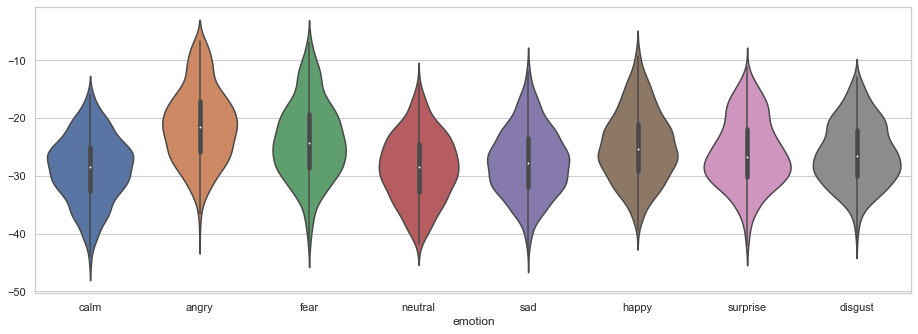

In [70]:
#violin plot for emotion
sns.violinplot(x="emotion", y=data2, data=data1, scale_hue=True)
sns.set(rc={'figure.figsize':(15.7,1.27)})
sns.set_theme(style="whitegrid")

Text(0, 0.5, 'Mean Normalised MFCC')

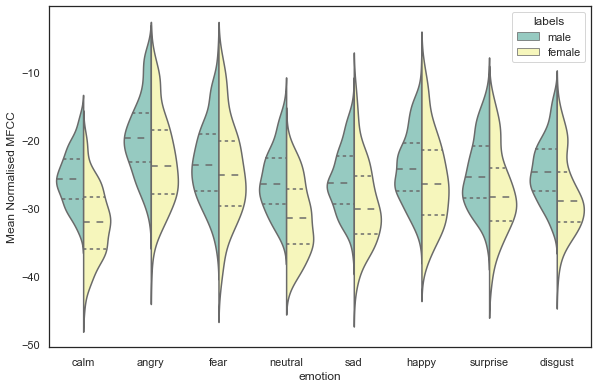

In [69]:
sns.violinplot(x="emotion", y=data2, data=data1, scale_hue=True, split=True, gridsize=100,
              scale="count", inner="quartiles", hue='labels', palette='Set3')
sns.set(rc={'figure.figsize':(15.7,5.27)})
sns.set_theme(style="whitegrid")
plt.ylabel('Mean Normalised MFCC')

Text(0, 0.5, 'Mean Normalised MFCC')

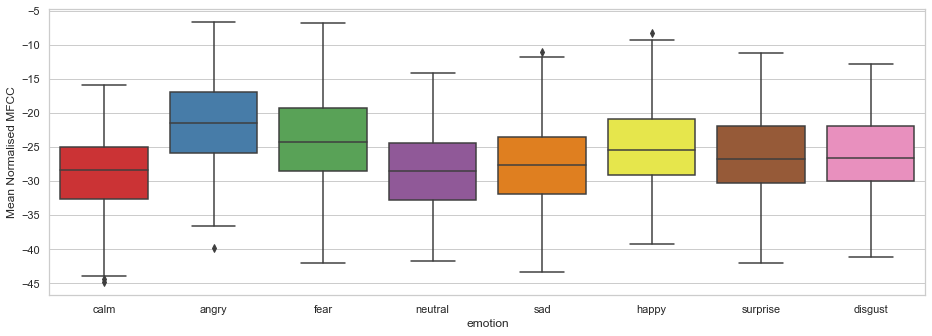

In [68]:
## boxplot of emotion classification 
sns.boxplot(x="emotion", y=data2, data=data1, palette='Set1')
sns.set(rc={'figure.figsize':(9.7,6.27)})
sns.set_theme(style="white")
plt.ylabel('Mean Normalised MFCC')